# Final Project: Stock and Revenue Data Analysis for Tesla and GameStop

In [83]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

%matplotlib inline

## Question 1 - Extracting Tesla Stock Data Using yfinance

In [84]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Web Scraping

In [85]:
URL_TESLA_REVENUE = "https://companiesmarketcap.com/tesla/revenue/"

response = requests.get(URL_TESLA_REVENUE)
soup = BeautifulSoup(response.text, "html.parser")

tesla_revenue: list[list[str]] = []

for row in soup.find_all("tr"):
    cells = row.find_all("td")

    if not len(cells):
        continue
    if len(tesla_revenue) and len(cells) != len(tesla_revenue[-1]):
        break

    tesla_revenue.append([cell.text.strip() for cell in cells])

tesla_df = pd.DataFrame(tesla_revenue, columns=["Year", "Revenue", "Change"])
tesla_df.head()

,Year,Revenue,Change
0,2024 (TTM),$95.31 B,-1.5%
1,2023,$96.77 B,18.8%
2,2022,$81.46 B,51.35%
3,2021,$53.82 B,70.67%
4,2020,$31.53 B,28.31%


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [86]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Web Scraping

In [87]:
URL_GAMESTOP_REVENUE = "https://companiesmarketcap.com/gamestop/revenue/"

response = requests.get(URL_GAMESTOP_REVENUE)
soup = BeautifulSoup(response.text, "html.parser")

gamestop_revenue: list[list[str]] = []

for row in soup.find_all("tr"):
    cells = row.find_all("td")

    if not len(cells):
        continue
    if len(gamestop_revenue) and len(cells) != len(gamestop_revenue[-1]):
        break

    gamestop_revenue.append([cell.text.strip() for cell in cells])

gamestop_df = pd.DataFrame(gamestop_revenue, columns=["Year", "Revenue", "Change"])
gamestop_df.head()

,Year,Revenue,Change
0,2024 (TTM),$4.83 B,-8.32%
1,2023,$5.27 B,-11.04%
2,2022,$5.92 B,-1.39%
3,2021,$6.01 B,18.09%
4,2020,$5.08 B,-21.28%


## Question 5 - Tesla Stock and Revenue Dashboard

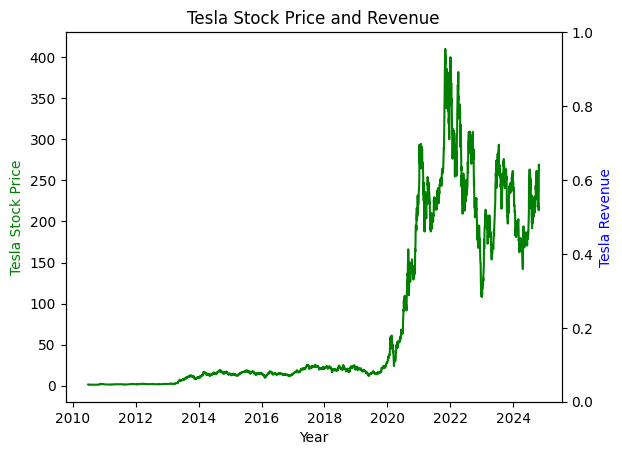

In [88]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tesla_data.index, tesla_data['Close'], 'g-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Tesla Stock Price', color='g')
ax2.set_ylabel('Tesla Revenue', color='b')
plt.title('Tesla Stock Price and Revenue')
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard

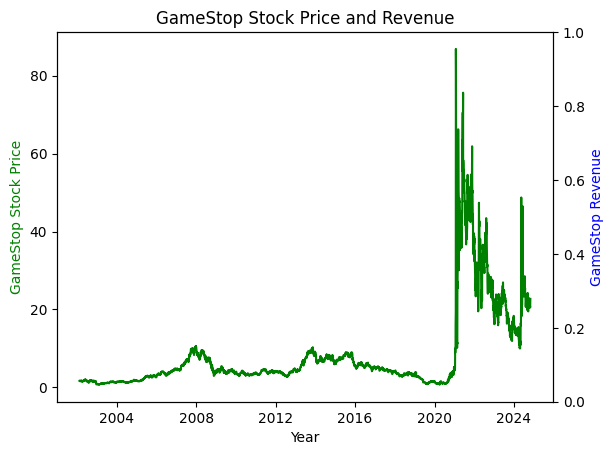

In [89]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(gamestop_data.index, gamestop_data['Close'], 'g-')
ax1.set_xlabel('Year')
ax1.set_ylabel('GameStop Stock Price', color='g')
ax2.set_ylabel('GameStop Revenue', color='b')
plt.title('GameStop Stock Price and Revenue')
plt.show()